In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the base path for your project folder in Google Drive
project_folder = '/content/drive/MyDrive/476 project'
dataset_path = project_folder + '/datasets/flights_sample_3m.csv'
images_folder = project_folder + '/images'

# Ensure the images folder exists
!mkdir -p "$images_folder"



Mounted at /content/drive


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os  # Make sure this is included at the top of your code

# Ensure plots are displayed within the notebook
%matplotlib inline

# Load the dataset
df = pd.read_csv(dataset_path)

# Convert FL_DATE to datetime format
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['MONTH'] = df['FL_DATE'].dt.month
df['DAY_OF_WEEK'] = df['FL_DATE'].dt.day_name()

# Set the style for seaborn
sns.set(style="whitegrid")

In [7]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'MONTH', 'DAY_OF_WEEK'],
      dtype='object')

In [ ]:
# Define the 30 largest airports by passenger traffic, ensuring geographical distribution
largest_airports = [
    'ATL',  # Atlanta, GA (Southeast)
    'LAX',  # Los Angeles, CA (West)
    'ORD',  # Chicago, IL (Midwest)
    'DFW',  # Dallas/Fort Worth, TX (Southwest)
    'DEN',  # Denver, CO (Mountain)
    'JFK',  # New York, NY (Northeast)
    'SEA',  # Seattle, WA (Northwest)
    'MIA',  # Miami, FL (Southeast)
    'PHX',  # Phoenix, AZ (Southwest)
    'BOS',  # Boston, MA (Northeast)
    'MSP',  # Minneapolis, MN (Midwest)
    'CLT',  # Charlotte, NC (Southeast)
    'LAS',  # Las Vegas, NV (West)
    'IAH',  # Houston, TX (South)
    'SFO',  # San Francisco, CA (West)
    'EWR',  # Newark, NJ (Northeast)
    'FLL',  # Fort Lauderdale, FL (Southeast)
    'DTW',  # Detroit, MI (Midwest)
    'PHL',  # Philadelphia, PA (Northeast)
    'BWI',  # Baltimore, MD (Northeast)
    'SLC',  # Salt Lake City, UT (Mountain)
    'SAN',  # San Diego, CA (West)
    'TPA',  # Tampa, FL (Southeast)
    'PDX',  # Portland, OR (Northwest)
    'MCO',  # Orlando, FL (Southeast)
    'HNL',  # Honolulu, HI (Pacific)
    'DCA',  # Washington, D.C. (Northeast)
    'STL',  # St. Louis, MO (Midwest)
    'AUS',  # Austin, TX (South)
    'BNA'   # Nashville, TN (South)
]


We opted to focus on 30 airports, ensuring a geographically diverse selection, rather than including all airports (such as smaller municipal or regional ones), to strike a balance between comprehensive analysis and computational efficiency. Including all airports, many of which have minimal traffic or delays, could introduce noise into the data, diluting the insights gained from busier hubs where delays are more significant. By selecting 30 airports distributed across different regions, we ensure representation of varied operational and environmental conditions, such as weather patterns, air traffic density, and logistical challenges, while maintaining manageable data size and reducing redundancy. This approach enhances the relevance and generalizability of our findings, as these 30 airports likely capture the majority of delays and operational dynamics influencing air travel on a national scale.

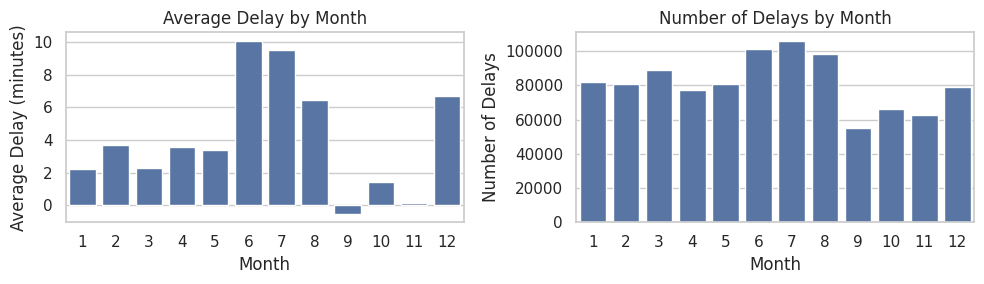

In [ ]:
# 1 & 2: Average Delay by Month and Number of Delays by Month
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot 1: Average Delay by Month
avg_delay_month = df.groupby('MONTH')['ARR_DELAY'].mean().reset_index()
sns.barplot(x='MONTH', y='ARR_DELAY', data=avg_delay_month, ax=axes[0])
axes[0].set_title('Average Delay by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Delay (minutes)')

# Plot 2: Number of Delays by Month
num_delays_month = df[df['ARR_DELAY'] > 0].groupby('MONTH').size().reset_index(name='Number of Delays')
sns.barplot(x='MONTH', y='Number of Delays', data=num_delays_month, ax=axes[1])
axes[1].set_title('Number of Delays by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Delays')

plt.tight_layout()
plt.show()

Analysis of the Graphs
Graph 1: Average Delay by Month
The graph shows a spike in average delays during June and July, with delays peaking at over 10 minutes.
Low average delays are observed in September and October, indicating better on-time performance during this period.
December shows a slight rise in average delays, likely due to holiday travel, weather disruptions, or increased congestion.
Months like February and March have moderate average delays, reflecting typical operational conditions without extreme disruptions.
Graph 2: Number of Delays by Month
The number of delays is highest during June, July, and August, aligning with peak summer travel and increased air traffic.
A significant drop in delays occurs in September, potentially reflecting a decrease in travel demand post-summer.
December shows an uptick in the number of delays, likely due to increased holiday travel.
The months with the lowest number of delays are October and November, suggesting lower congestion and smoother operations during the fall season.
Combined Insights:
Summer Months (June and July):

High average delays and a high number of delays indicate significant operational stress due to increased passenger traffic and potentially adverse weather (e.g., thunderstorms).
Fall Months (September and October):

Both average delays and the number of delays drop, highlighting a period of reduced air travel demand and fewer operational challenges.
December:

A notable rise in delays (both in number and average) corresponds to holiday season disruptions, which could be caused by higher traffic and winter weather conditions.
Winter-Spring Months (January to March):

Moderate delays in both metrics reflect standard operational conditions, potentially influenced by occasional weather disruptions.
Recommendations:
Focus on mitigating delays during summer months by improving resource allocation and preparing for weather disruptions.
Leverage the low-delay months (September-October) to schedule maintenance and optimize operations for efficiency.
Prepare for December’s holiday rush with enhanced staffing and contingency planning for adverse weather.

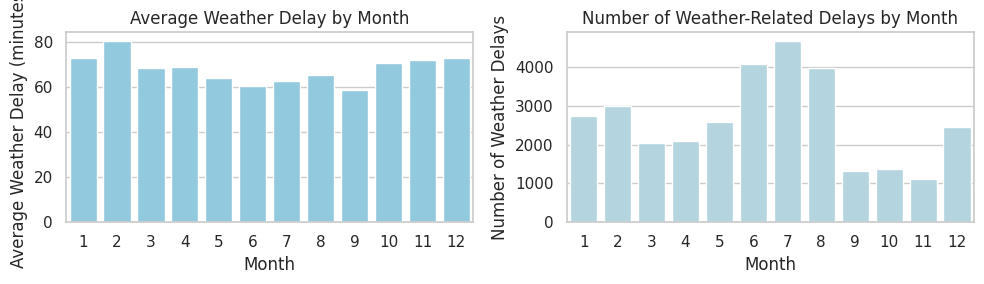

In [ ]:
# 3 & 4: Average Weather Delay by Month and Number of Weather-Related Delays by Month
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot 3: Average Weather Delay by Month
avg_weather_delay_month = df[df['DELAY_DUE_WEATHER'] > 0].groupby('MONTH')['DELAY_DUE_WEATHER'].mean().reset_index()
sns.barplot(x='MONTH', y='DELAY_DUE_WEATHER', data=avg_weather_delay_month, ax=axes[0], color="skyblue")
axes[0].set_title('Average Weather Delay by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Weather Delay (minutes)')

# Plot 4: Number of Weather-Related Delays by Month
num_weather_delays_month = df[df['DELAY_DUE_WEATHER'] > 0].groupby('MONTH').size().reset_index(name='Number of Weather Delays')
sns.barplot(x='MONTH', y='Number of Weather Delays', data=num_weather_delays_month, ax=axes[1], color="lightblue")
axes[1].set_title('Number of Weather-Related Delays by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Weather Delays')

plt.tight_layout()
plt.show()


<ipython-input-11-2fdfda405204>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


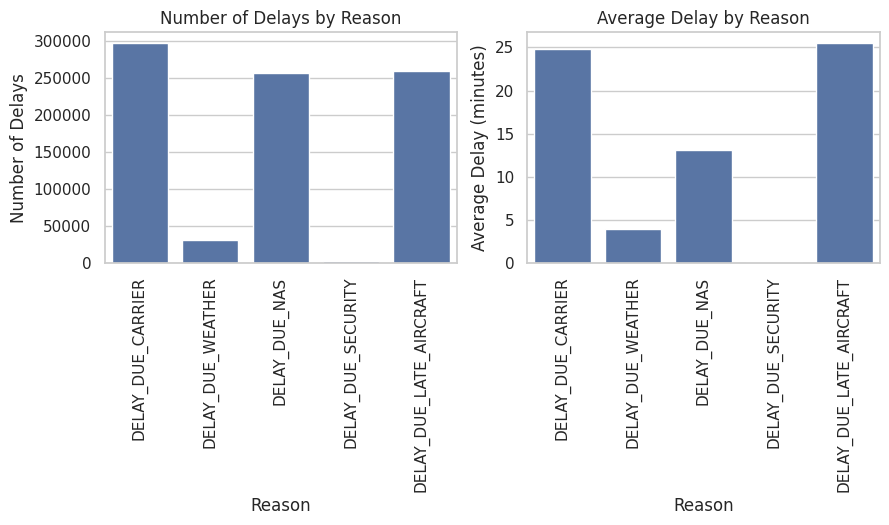

In [ ]:
# 5 & 6: Number of Delays by Reason and Average Delay by Reason
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot 5: Number of Delays by Reason
delay_reasons = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
num_delays_reason = df[delay_reasons].apply(lambda x: (x > 0).sum()).reset_index()
num_delays_reason.columns = ['Reason', 'Number of Delays']
sns.barplot(x='Reason', y='Number of Delays', data=num_delays_reason, ax=axes[0])
axes[0].set_title('Number of Delays by Reason')
axes[0].set_xlabel('Reason')
axes[0].set_ylabel('Number of Delays')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Plot 6: Average Delay by Reason
avg_delay_reason = df[delay_reasons].mean().reset_index()
avg_delay_reason.columns = ['Reason', 'Average Delay (minutes)']
sns.barplot(x='Reason', y='Average Delay (minutes)', data=avg_delay_reason, ax=axes[1])
axes[1].set_title('Average Delay by Reason')
axes[1].set_xlabel('Reason')
axes[1].set_ylabel('Average Delay (minutes)')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

plt.tight_layout()
plt.show()


Analysis of the Graphs

Graph 1: Number of Delays by Reason
Carrier Delays are the most frequent cause, followed closely by Late Aircraft Delays and NAS (National Airspace System) Delays.
Weather Delays are relatively rare, indicating that weather conditions, while impactful, contribute to fewer delays overall compared to operational or logistical issues.
Security Delays are almost negligible, suggesting minimal disruption caused by security issues.

Graph 2: Average Delay by Reason
Late Aircraft Delays have the highest average delay time, exceeding 25 minutes. This indicates that when late aircraft cause delays, they tend to propagate significantly.
Carrier Delays also have a high average delay time of around 20-25 minutes, showing their substantial impact on overall schedules.
NAS Delays have a moderate average delay time of around 10-15 minutes, reflecting system-related inefficiencies that are shorter but frequent.
Weather Delays, despite being infrequent, cause shorter delays on average (~5 minutes), which might indicate effective mitigation measures for weather-related issues.
Security Delays are non existant

Carrier and Late Aircraft Delays:

These two reasons dominate in terms of both frequency and impact, making them critical targets for delay mitigation efforts.
Late aircraft delays likely result from cascading effects, where one delay impacts multiple subsequent flights.

NAS Delays:

While slightly less impactful on average delay times, NAS delays are frequent enough to require optimization in air traffic control and national airspace systems.

Weather Delays:

The low frequency and short average delay times indicate effective weather forecasting and proactive measures by airlines.

Recommendations:
Remove Security delays

Focus on using carrier delays and late aircraft delays, as they have the most significant impact on passengers and operations.

Enhance operational efficiency and schedule planning to mitigate cascading delays.

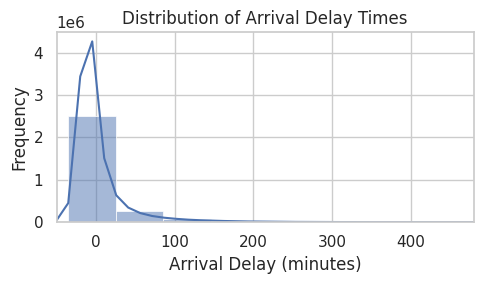

In [ ]:
# 7. Histogram for Arrival Delay (up to 8 hours)
fig, ax = plt.subplots(figsize=(5, 3))

sns.histplot(df['ARR_DELAY'], bins=50, kde=True, ax=ax)
ax.set_xlim(-50, 480)  # Limit to -50 to 8 hours (480 minutes)
ax.set_title('Distribution of Arrival Delay Times')
ax.set_xlabel('Arrival Delay (minutes)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()



The graph shows the distribution of arrival delay times, highlighting that the majority of flights experience minimal delays, with a sharp peak near 0 minutes. This suggests that most flights are either on time or only slightly delayed. However, the right tail of the distribution indicates the presence of some flights with significant delays, exceeding 100 minutes, though these are relatively rare. The steep drop-off in frequency as delay times increase demonstrates the skewed nature of the data, with delays beyond 60 minutes being uncommon. This imbalance suggests that most of the predictive power for our models will focus on distinguishing between short delays and flights arriving on time, while accurately capturing the smaller subset of extreme delays will require careful feature engineering and potentially robust models to handle outliers effectively. Understanding this distribution is critical as it shapes the strategy for developing and evaluating our prediction models.

<ipython-input-27-4dab0d1af8f5>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


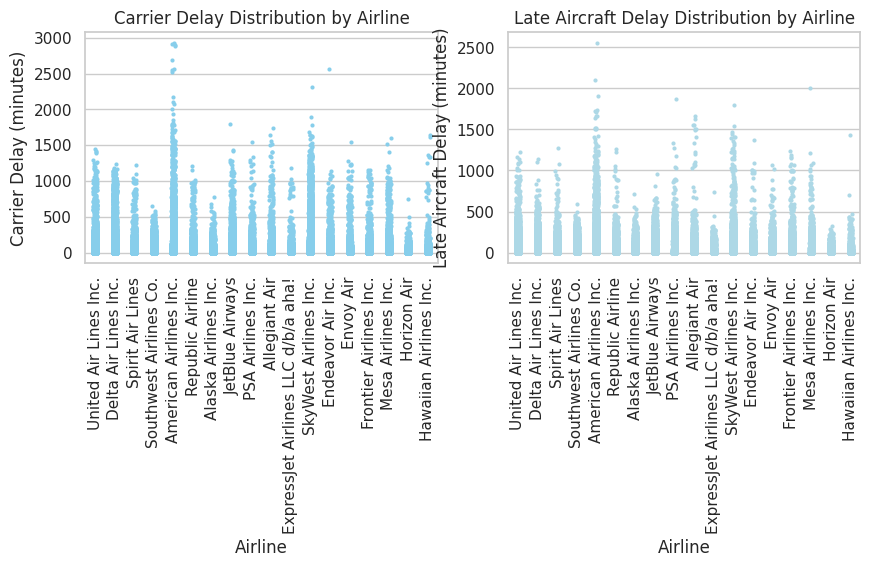

In [ ]:
# 8. Delay Distribution by Airline for Carrier and Late Aircraft Delays
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Strip plot for Carrier Delays
sns.stripplot(x='AIRLINE', y='DELAY_DUE_CARRIER', data=df, ax=axes[0], color="skyblue", size=3)
axes[0].set_title('Carrier Delay Distribution by Airline')
axes[0].set_xlabel('Airline')
axes[0].set_ylabel('Carrier Delay (minutes)')
axes[0].tick_params(axis='x', rotation=90)

# Strip plot for Late Aircraft Delays
sns.stripplot(x='AIRLINE', y='DELAY_DUE_LATE_AIRCRAFT', data=df, ax=axes[1], color="lightblue", size=3)
axes[1].set_title('Late Aircraft Delay Distribution by Airline')
axes[1].set_xlabel('Airline')
axes[1].set_ylabel('Late Aircraft Delay (minutes)')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

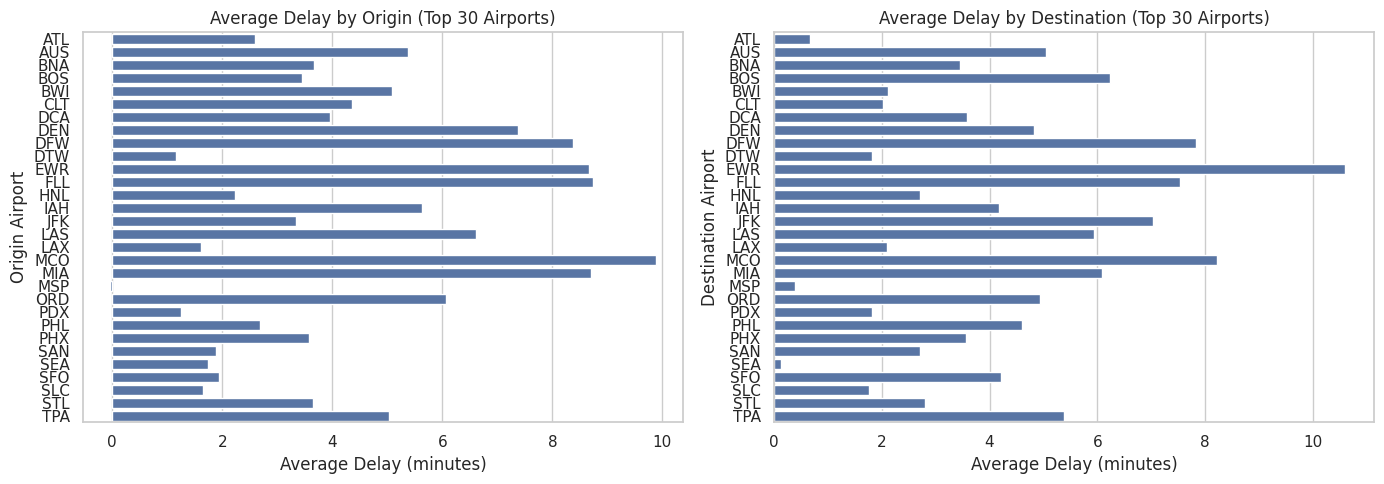

In [ ]:
# 9 & 10: Average Delay by Origin and Destination for Top 30 Airports
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 9: Average Delay by Origin
top_origins = df[df['ORIGIN'].isin(largest_airports)].groupby('ORIGIN')['ARR_DELAY'].mean().reset_index()
sns.barplot(x='ARR_DELAY', y='ORIGIN', data=top_origins, ax=axes[0])
axes[0].set_title('Average Delay by Origin (Top 30 Airports)')
axes[0].set_xlabel('Average Delay (minutes)')
axes[0].set_ylabel('Origin Airport')

# Plot 10: Average Delay by Destination
top_destinations = df[df['DEST'].isin(largest_airports)].groupby('DEST')['ARR_DELAY'].mean().reset_index()
sns.barplot(x='ARR_DELAY', y='DEST', data=top_destinations, ax=axes[1])
axes[1].set_title('Average Delay by Destination (Top 30 Airports)')
axes[1].set_xlabel('Average Delay (minutes)')
axes[1].set_ylabel('Destination Airport')

plt.tight_layout()
plt.show()


Analysis of the Graphs

Graph 1: Average Delay by Origin (Top 30 Airports)
Airports with High Average Delays as Origins:
Notable airports like DFW (Dallas/Fort Worth) and ORD (Chicago O'Hare) have the highest average delays as origin airports, exceeding 6 minutes on average. These delays may reflect heavy traffic, operational challenges, or weather-related disruptions.
Other origin airports, such as EWR (Newark), LAX (Los Angeles), and JFK (New York John F. Kennedy), also exhibit moderate delays, likely due to their status as major hubs.
Airports with Low Average Delays as Origins:
Airports such as PDX (Portland), SEA (Seattle-Tacoma), and HNL (Honolulu) show significantly lower average delays, reflecting smoother operations, potentially due to lower congestion or favorable weather conditions.

Graph 2: Average Delay by Destination (Top 30 Airports)
Airports with High Average Delays as Destinations:

EWR (Newark) stands out with the highest average delays as a destination, surpassing 9 minutes. This could be attributed to congestion, high air traffic density, or frequent weather disruptions in the New York area.
Other airports like ORD (Chicago O'Hare), DFW (Dallas/Fort Worth), and JFK (New York John F. Kennedy) also exhibit relatively high delays as destination airports.
Airports with Low Average Delays as Destinations:

HNL (Honolulu) and SEA (Seattle-Tacoma) again show the lowest delays as destinations, emphasizing their consistent efficiency in managing operations.
Combined Insights:
Congested Hubs (EWR, ORD, JFK, DFW):

These airports experience delays both as origins and destinations, indicating systemic issues such as high passenger volumes, frequent adverse weather, or logistical challenges.
Consistently Efficient Airports (HNL, SEA):

Airports like Honolulu and Seattle-Tacoma exhibit low delays in both roles, which might be due to favorable geography, effective traffic management, or lower air traffic volumes.
Impact of Airport Role:

Airports serving as major hubs (e.g., DFW, ORD) face operational complexity and higher average delays in both origin and destination roles, while regional or less congested airports maintain better punctuality.

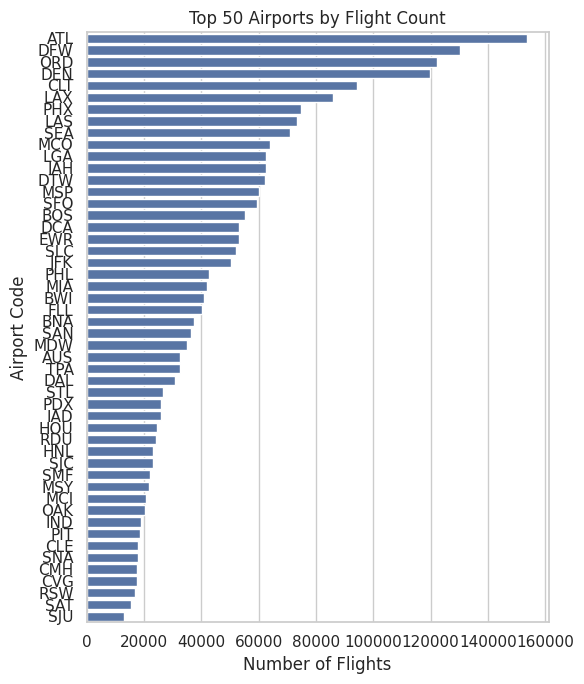

In [ ]:
# 11. Top 50 Airports by Flight Count
fig, ax = plt.subplots(figsize=(6, 7))

top_50_airports = df['ORIGIN'].value_counts().head(50).reset_index()
top_50_airports.columns = ['Airport', 'Flight Count']
sns.barplot(data=top_50_airports, x='Flight Count', y='Airport', ax=ax)
ax.set_title('Top 50 Airports by Flight Count')
ax.set_xlabel('Number of Flights')
ax.set_ylabel('Airport Code')

plt.tight_layout()
plt.show()


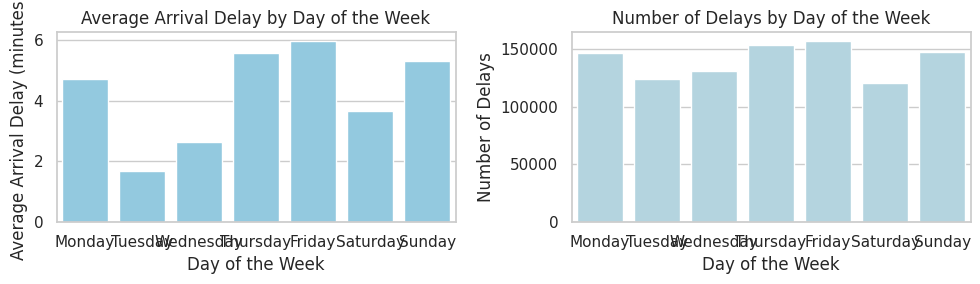

In [ ]:
# 12. Average Arrival Delay and Number of Delays by Day of the Week
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Average Arrival Delay by Day of the Week
avg_delay_day = df.groupby('DAY_OF_WEEK')['ARR_DELAY'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
sns.barplot(x=avg_delay_day.index, y=avg_delay_day.values, ax=axes[0], color="skyblue")
axes[0].set_title('Average Arrival Delay by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average Arrival Delay (minutes)')

# Number of Delays by Day of the Week
num_delays_day = df[df['ARR_DELAY'] > 0].groupby('DAY_OF_WEEK').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index(name='Number of Delays')
sns.barplot(x=num_delays_day['DAY_OF_WEEK'], y=num_delays_day['Number of Delays'], ax=axes[1], color="lightblue")
axes[1].set_title('Number of Delays by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Delays')

plt.tight_layout()
plt.show()


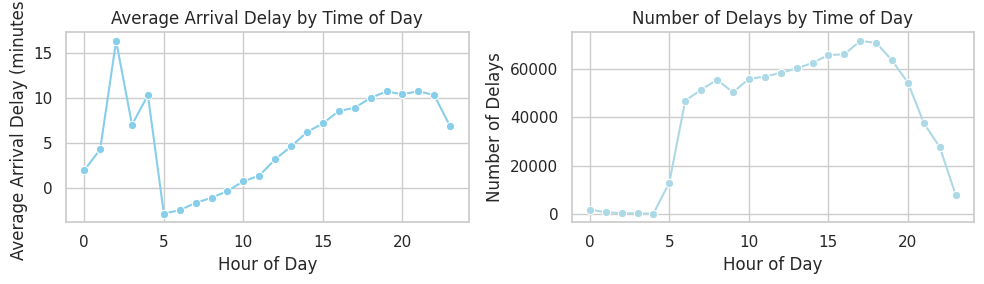

In [ ]:
# Ensure DEP_HOUR is created
if 'DEP_HOUR' not in df.columns:
    df['DEP_HOUR'] = df['CRS_DEP_TIME'] // 100

# 13. Average Arrival Delay and Number of Delays by Time of Day
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Average Arrival Delay by Time of Day
avg_delay_hour = df.groupby('DEP_HOUR')['ARR_DELAY'].mean().reset_index()
sns.lineplot(data=avg_delay_hour, x='DEP_HOUR', y='ARR_DELAY', ax=axes[0], marker="o", color="skyblue")
axes[0].set_title('Average Arrival Delay by Time of Day')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Arrival Delay (minutes)')

# Number of Delays by Time of Day
num_delays_hour = df[df['ARR_DELAY'] > 0].groupby('DEP_HOUR').size().reset_index(name='Number of Delays')
sns.lineplot(data=num_delays_hour, x='DEP_HOUR', y='Number of Delays', ax=axes[1], marker="o", color="lightblue")
axes[1].set_title('Number of Delays by Time of Day')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Number of Delays')

plt.tight_layout()
plt.show()


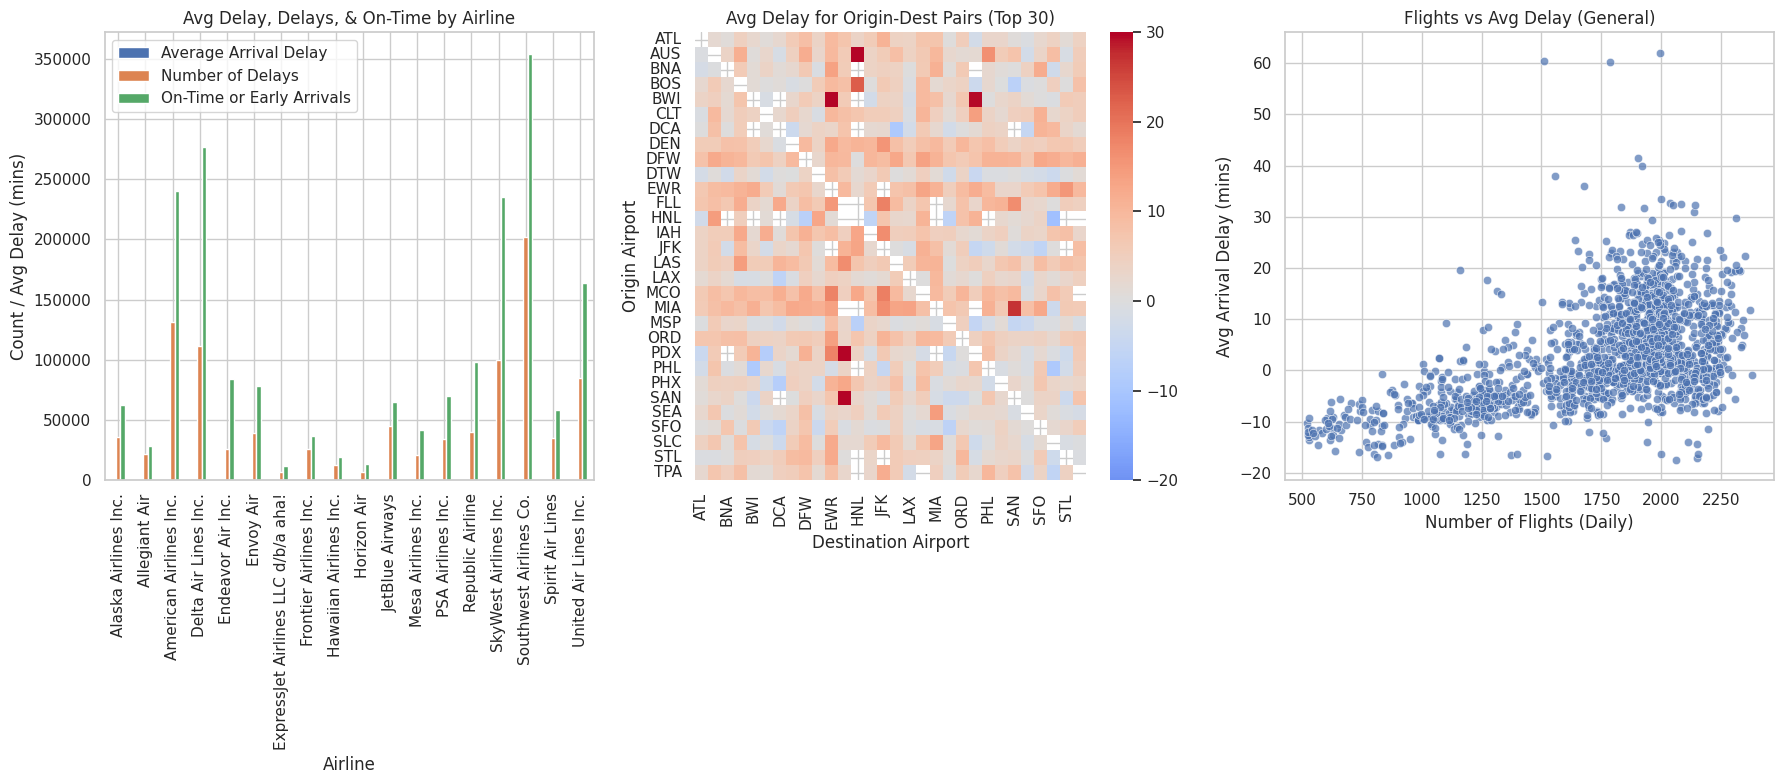

In [ ]:
# 15. Plot: Average delay, count of delays, and count of on-time/early flights by airline
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# Ensure data for airline summary is created
avg_arr_delay_airline = df.groupby('AIRLINE')['ARR_DELAY'].mean()
num_delays_airline = df[df['ARR_DELAY'] > 0].groupby('AIRLINE').size()
num_on_time_or_early = df[df['ARR_DELAY'] <= 0].groupby('AIRLINE').size()
airline_summary = pd.DataFrame({
    'Average Arrival Delay': avg_arr_delay_airline,
    'Number of Delays': num_delays_airline,
    'On-Time or Early Arrivals': num_on_time_or_early
}).fillna(0).reset_index()

airline_summary.plot(x='AIRLINE', kind='bar', stacked=False, ax=axes[0])
axes[0].set_title('Avg Delay, Delays, & On-Time by Airline')
axes[0].set_xlabel('Airline')
axes[0].set_ylabel('Count / Avg Delay (mins)')
axes[0].tick_params(axis='x', rotation=90)

# 16. Plot: Average arrival delay for origin-destination pairs (heatmap)
origin_dest_delay = df.groupby(['ORIGIN', 'DEST'])['ARR_DELAY'].mean().reset_index()
top_airports_df = origin_dest_delay[
    origin_dest_delay['ORIGIN'].isin(largest_airports) & origin_dest_delay['DEST'].isin(largest_airports)
]
delay_pivot = top_airports_df.pivot_table(index="ORIGIN", columns="DEST", values="ARR_DELAY", aggfunc="mean")
sns.heatmap(delay_pivot, cmap="coolwarm", center=0, annot=False, vmin=-20, vmax=30, ax=axes[1])
axes[1].set_title('Avg Delay for Origin-Dest Pairs (Top 30)')
axes[1].set_xlabel('Destination Airport')
axes[1].set_ylabel('Origin Airport')
axes[1].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='y', rotation=0)

# 17. Plot: Relationship between number of flights and average delay (general)
general_flight_summary = df.groupby('FL_DATE').agg(
    Number_of_Flights=('FL_NUMBER', 'count'),
    Average_Arrival_Delay=('ARR_DELAY', 'mean')
).reset_index()

sns.scatterplot(
    data=general_flight_summary,
    x='Number_of_Flights',
    y='Average_Arrival_Delay',
    alpha=0.7,
    ax=axes[2]
)
axes[2].set_title('Flights vs Avg Delay (General)')
axes[2].set_xlabel('Number of Flights (Daily)')
axes[2].set_ylabel('Avg Arrival Delay (mins)')

plt.tight_layout()
plt.show()


Analysis of the Graphs

Graph 1: Average Delay, Number of Delays, and On-Time Arrivals by Airline
High Delay Airlines:
American Airlines Inc. and United Air Lines Inc. have the highest number of delays and substantial average delay times, suggesting systemic issues in managing schedules or operations.
Southwest Airlines Co. and Delta Air Lines Inc. have high volumes of on-time or early arrivals despite moderate numbers of delays, reflecting better overall time management.
Low Delay Airlines:
Hawaiian Airlines Inc. stands out with very low average delays and fewer total delays, highlighting efficient operations, potentially due to its smaller operational scale or favorable geography.

Graph 2: Average Delay for Origin-Destination Pairs (Top 30 Airports)
High Delay Routes:
Routes involving EWR (Newark), ORD (Chicago O'Hare), and JFK (New York John F. Kennedy) as either origin or destination show the highest average delays. These hubs are known for congestion and adverse weather impacts.
Certain long-haul flights or popular business routes likely contribute to these spikes.
Low Delay Routes:
Routes involving HNL (Honolulu) and SEA (Seattle-Tacoma) are consistently low in delays, reflecting operational efficiency and lower congestion.

Graph 3: Flights vs. Average Delay (General)
Positive Correlation:
A general positive correlation is observed between the number of daily flights and average delay times, indicating that busier routes or airports tend to have higher delays due to congestion and operational challenges.
However, outliers exist with high delays despite relatively low flight numbers, which could reflect specific route challenges or extreme conditions (e.g., weather or logistical issues).
Combined Insights
Systemic Airline Delays:

Major carriers like American Airlines Inc. and United Air Lines Inc. face consistent delays, likely due to their extensive networks and operational complexity.
Smaller airlines like Hawaiian Airlines Inc. excel in punctuality, benefiting from focused operations in less congested airspaces.
Congested Routes:

High delays in routes involving major hubs (e.g., EWR, ORD, JFK) indicate that infrastructure limitations and traffic density are critical factors affecting punctuality.
Operational Efficiency:

Airlines with high numbers of flights but moderate delays (e.g., Delta and Southwest) demonstrate effective congestion management, setting a benchmark for improving operational efficiency.

CODE TO CLEAN DATA AND ADD FEATURES!!!!!!!

In [3]:
import pandas as pd
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Specify your dataset file path
project_folder = '/content/drive/MyDrive/476 project'
dataset_path = project_folder + '/datasets/flights_sample_3m.csv'

# Define the list of largest airports (replace with actual airport codes)
largest_airports = ['ATL', 'ORD', 'LAX', 'DFW', 'DEN', 'JFK', 'SFO', 'SEA', 'LAS', 'MIA', 'PHX', 'IAH', 'CLT', 'MCO', 'EWR', 'MSP', 'BOS', 'DTW', 'PHL', 'LGA', 'FLL', 'BWI', 'SLC', 'DCA', 'SAN', 'TPA', 'HNL', 'PDX', 'STL', 'AUS']

# Step 1: Filter for flights that originate AND land at the 30 largest airports
df = df.loc[(df['ORIGIN'].isin(largest_airports)) & (df['DEST'].isin(largest_airports))]

# Step 2: Remove canceled flights
df = df.loc[df['CANCELLED'] == 0]

# Step 3: Remove flights with extreme delays (longer than 8 hours or 480 minutes)
df = df.loc[df['ARR_DELAY'] <= 480]

# Step 4: Convert FL_DATE to datetime and filter out flights from 2020
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')
df = df.loc[df['FL_DATE'].dt.year != 2020]

# Step 5: Convert the FL_DATE column into just the month as a numerical value
df.loc[:, 'MONTH'] = df['FL_DATE'].dt.month

# Step 6: Drop rows where 'DELAY_DUE_SECURITY' is greater than 0
df = df.loc[(df['DELAY_DUE_SECURITY'].isna()) | (df['DELAY_DUE_SECURITY'] == 0)]

# Feature Engineering
# 1. Extract hour of the day from CRS_DEP_TIME (assuming CRS_DEP_TIME is in HHMM format)
df.loc[:, 'DEP_HOUR'] = df['CRS_DEP_TIME'] // 100

# 2. Extract the day of the week from FL_DATE
df.loc[:, 'DAY_OF_WEEK'] = df['FL_DATE'].dt.dayofweek

# Step 7: Calculate monthly average delay and scale it between -1 and 1
monthly_avg_delay = df.groupby('MONTH')['ARR_DELAY'].mean().reset_index()
monthly_avg_delay.columns = ['MONTH', 'MONTHLY_AVG_DELAY']
min_monthly_delay = monthly_avg_delay['MONTHLY_AVG_DELAY'].min()
max_monthly_delay = monthly_avg_delay['MONTHLY_AVG_DELAY'].max()
monthly_avg_delay['MONTHLY_DELAY_INDICATOR'] = 2 * (monthly_avg_delay['MONTHLY_AVG_DELAY'] - min_monthly_delay) / (max_monthly_delay - min_monthly_delay) - 1
df = pd.merge(df, monthly_avg_delay[['MONTH', 'MONTHLY_DELAY_INDICATOR']], on='MONTH', how='left')

# Step 8: Calculate average arrival delay for each route (ORIGIN-DEST combination) and scale it between -1 and 1
route_avg_delay = df.groupby(['ORIGIN', 'DEST'])['ARR_DELAY'].mean().reset_index()
route_avg_delay.columns = ['ORIGIN', 'DEST', 'ROUTE_AVG_DELAY']
min_route_delay = route_avg_delay['ROUTE_AVG_DELAY'].min()
max_route_delay = route_avg_delay['ROUTE_AVG_DELAY'].max()
route_avg_delay['ROUTE_DELAY_INDICATOR'] = 2 * (route_avg_delay['ROUTE_AVG_DELAY'] - min_route_delay) / (max_route_delay - min_route_delay) - 1
df = pd.merge(df, route_avg_delay[['ORIGIN', 'DEST', 'ROUTE_DELAY_INDICATOR']], on=['ORIGIN', 'DEST'], how='left')

# Step 9: Drop unnecessary columns
df = df.drop(columns=['FL_DATE', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'CANCELLED',
                      'CANCELLATION_CODE', 'DIVERTED', 'CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME',
                      'ELAPSED_TIME', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'ORIGIN_CITY', 'DEST_CITY',
                      'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
                      'DELAY_DUE_LATE_AIRCRAFT', 'FL_NUMBER'])

# Step 10: Handle NaN values by dropping rows with missing data
df = df.dropna()

# Create Dataset 1 - ARR_DELAY as binary values (1 for >=15, 0 for <15)
df_regression = df.copy()
df_regression.loc[:, 'ARR_DELAY'] = (df_regression['ARR_DELAY'] >= 15).astype(int)

# Create Dataset 2 - ARR_DELAY with values below 15 as 0, others remain as is
df_classification = df.copy()
df_classification.loc[:, 'ARR_DELAY'] = df_classification['ARR_DELAY'].apply(lambda x: 0 if x < 15 else x)

# Save the datasets to Google Drive
output_folder = '/content/drive/MyDrive/476 project/datasets'
os.makedirs(output_folder, exist_ok=True)

output_path_regression = os.path.join(output_folder, 'flight_data_regression_with_features1.csv')
output_path_classification = os.path.join(output_folder, 'flight_data_classification_with_features.csv')

df_regression.to_csv(output_path_regression, index=False)
df_classification.to_csv(output_path_classification, index=False)

print(f"Dataset 1 (Regression - Binary Indicator) saved at: {output_path_regression}")
#print(f"Dataset 2 (Classification with Features) saved at: {output_path_classification}")



Mounted at /content/drive


<ipython-input-3-dc3893f417b5>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')
<ipython-input-3-dc3893f417b5>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'DEP_HOUR'] = df['CRS_DEP_TIME'] // 100


Dataset 1 (Regression - Binary Indicator) saved at: /content/drive/MyDrive/476 project/datasets/flight_data_regression_with_features1.csv


In [4]:
df.head()

,AIRLINE,ORIGIN,DEST,ARR_DELAY,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,MONTH,DAY_OF_WEEK,DEP_HOUR,MONTHLY_DELAY_INDICATOR,ROUTE_DELAY_INDICATOR
0,United Air Lines Inc.,FLL,EWR,-14.0,186.0,153.0,1065.0,1,2,11,-0.626652,-0.445906
1,Delta Air Lines Inc.,MSP,SEA,-5.0,235.0,189.0,1399.0,11,5,21,-0.908221,-0.836797
2,United Air Lines Inc.,DEN,MSP,0.0,118.0,87.0,680.0,7,4,9,0.980383,-0.625965
3,Delta Air Lines Inc.,MSP,SFO,24.0,260.0,249.0,1589.0,3,0,16,-0.345450,-0.789074
4,American Airlines Inc.,DCA,BOS,-29.0,109.0,58.0,399.0,6,6,10,1.000000,-0.641270


Explanation of the Process

Overview:
In this code, we are preparing and engineering features for two datasets to predict flight delays based on the insights gathered from the graphs. The process involves filtering, cleaning, feature engineering, and creating two datasets tailored for different predictive tasks: binary classification and regression with transformations.

Key Steps:

Filter for Largest Airports:

We restrict the data to flights originating and landing at the top 30 largest airports to focus on high-traffic hubs, which are better represented in delay trends. This decision ensures that our model generalizes to significant and consistent contributors to flight delays, as seen in the graphs showing the dominance of delays at major hubs (e.g., ORD, EWR, DFW).

Remove Irrelevant or Extreme Cases:

Canceled flights are excluded since they do not contribute to arrival delays.
Flights with extreme delays (over 8 hours) are removed as they are likely outliers and can distort model training.
Flights from 2020 are excluded to avoid anomalies caused by the pandemic's impact on air travel patterns.

Feature Engineering for Predictive Power:

Month of Flight:
We extract the month as a numeric value to analyze seasonal patterns (e.g., peak delays in June and July, as shown in the "Average Delay by Month" graph).
Departure Hour: Extracted to capture time-of-day trends that correlate with delays, reflecting congestion during peak hours (seen in flight volume graphs).
Day of the Week: Included to account for operational patterns that vary between weekdays and weekends.
Monthly Delay Indicator:
Scaled average delays for each month are added to capture the general delay trend for a given time of year.
Route Delay Indicator: Scaled average delays for each origin-destination pair are included to account for the specific delay dynamics of high-traffic routes, as seen in the heatmap graph.

Create Two Datasets for Different Modeling Tasks:

Dataset 1 (Binary Regression):
Converts the target variable (ARR_DELAY) into a binary regression indicator (1 if absolute delay).
This dataset aligns with the flights vs. delay prediction graph, where the primary concern is determining whether a flight is delayed beyond the 15-minute threshold.

Dataset 2 (Delay Magnitude Regression):
Converts all delays below 15 minutes into 0 while keeping delays over 15 minutes as continuous values.
This dataset focuses on predicting the magnitude of delays for flights with significant delays, addressing patterns seen in the delay distribution graph.

Clean-Up and Save:
Unnecessary columns are removed to streamline the datasets for modeling.
Rows with missing data are dropped to ensure model consistency and performance.
The processed datasets are saved for easy access and further use.
Why This Approach?
Insights from the Graphs:

Delay Distribution: The majority of flights have minimal delays, but a significant right-skew in the data highlights the need to differentiate between minor and major delays. Dataset 2 addresses this by focusing on delay magnitude.
Monthly and Route Trends: Seasonal and route-specific trends are key delay drivers, as seen in the "Average Delay by Month" and "Route Delay Heatmap" graphs. These trends are captured using MONTHLY_DELAY_INDICATOR and ROUTE_DELAY_INDICATOR.
Airline and Airport Patterns: Major hubs (e.g., EWR, ORD, DFW) and airlines with frequent delays (e.g., American Airlines) contribute significantly to delays, motivating the focus on high-traffic airports and routes.

Model Goals:

The binary classification dataset aligns with the task of identifying whether a flight is likely to experience a delay beyond a critical threshold (15 minutes), which is operationally significant for passengers and airlines.
The delay magnitude dataset provides granular insight into delays for flights significantly impacted, allowing for more precise predictions for delay-heavy routes and times.

Feature Engineering:

Features like departure hour, day of the week, monthly trends, and route-specific averages directly address the patterns observed in the graphs, enhancing the predictive power of the models.


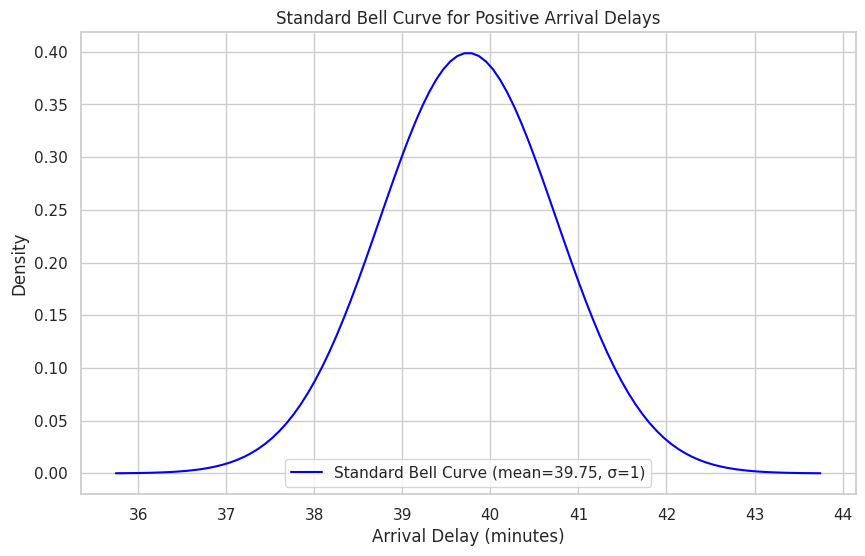

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Filter the DataFrame to include only positive arrival delays
positive_delays = df[df['ARR_DELAY'] > 0]

# Calculate the mean of the positive arrival delays
delay_mean = positive_delays['ARR_DELAY'].mean()

# Generate x-values around the mean, within ±4 standard deviations
x_values = np.linspace(delay_mean - 4, delay_mean + 4, 100)
y_values = stats.norm.pdf(x_values, loc=delay_mean, scale=1)  # Standard deviation of 1

# Plot the standard bell curve centered at the mean of positive delays
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, color='blue', label=f'Standard Bell Curve (mean={delay_mean:.2f}, σ=1)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Density')
plt.title('Standard Bell Curve for Positive Arrival Delays')
plt.legend()
plt.show()


